In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
%matplotlib inline

In [2]:
main_df = pd.read_csv("Data Set 2.csv", index_col=False)
main_df

,id,customer_id,location_id,channel,amount,bill_no,created_on
0,42877344,60,192,uber,1039,GGN001-24323,24-06-2018 00:00
1,35625005,134,535,takeaway,1029,DEL007-1522,14-01-2018 19:21
2,44397299,166,347,uber,355,DEL005-29173,13-09-2018 13:40
3,44405460,166,347,uber,371,DEL005-29180,13-09-2018 14:33
4,44717004,166,347,uber,371,DEL005-29603,16-09-2018 12:40
...,...,...,...,...,...,...,...
533322,63920571,11655184,218,zomato,674,GGN004-49266,10-04-2019 14:21
533323,63920575,11655185,4002,dine in,1565,DEL009-26660,10-04-2019 10:11
533324,63920583,11655186,194,zomato,217,GGN002-70779,10-04-2019 15:44
533325,63920586,11655187,192,uber,252,GGN001-88302,10-04-2019 16:21


In [3]:
test_df = main_df.copy()
test_df['total_orders'] = 1

In [4]:
test_df['created_on'] = pd.to_datetime(main_df.created_on,format='%d-%m-%Y %H:%M')
# df.ix[]
# print(test)
test = test_df.sort_values("created_on")
test_df

,id,customer_id,location_id,channel,amount,bill_no,created_on,total_orders
0,42877344,60,192,uber,1039,GGN001-24323,2018-06-24 00:00:00,1
1,35625005,134,535,takeaway,1029,DEL007-1522,2018-01-14 19:21:00,1
2,44397299,166,347,uber,355,DEL005-29173,2018-09-13 13:40:00,1
3,44405460,166,347,uber,371,DEL005-29180,2018-09-13 14:33:00,1
4,44717004,166,347,uber,371,DEL005-29603,2018-09-16 12:40:00,1
...,...,...,...,...,...,...,...,...
533322,63920571,11655184,218,zomato,674,GGN004-49266,2019-04-10 14:21:00,1
533323,63920575,11655185,4002,dine in,1565,DEL009-26660,2019-04-10 10:11:00,1
533324,63920583,11655186,194,zomato,217,GGN002-70779,2019-04-10 15:44:00,1
533325,63920586,11655187,192,uber,252,GGN001-88302,2019-04-10 16:21:00,1


In [5]:
test['created_on'].min()
# df['InvoiceDate'].min()


Timestamp('2018-01-01 00:00:00')

In [6]:
test['created_on'].max()


Timestamp('2019-04-10 22:49:00')

In [7]:
user = test.groupby(['customer_id'])['created_on'].min().reset_index()
user

,customer_id,created_on
0,60,2018-06-24 00:00:00
1,134,2018-01-14 19:21:00
2,166,2018-09-13 13:40:00
3,180,2018-01-17 13:40:00
4,199,2018-08-15 19:39:00
...,...,...
251993,11655184,2019-04-10 14:21:00
251994,11655185,2019-04-10 10:11:00
251995,11655186,2019-04-10 15:44:00
251996,11655187,2019-04-10 16:21:00


In [8]:
user.columns = ['customer_id','order_month']

In [9]:
user['reg_month'] = user['order_month'].values.astype('datetime64[M]')

In [10]:
min_month = test['created_on'].values.astype('datetime64[M]').min()
max_month = test['created_on'].values.astype('datetime64[M]').max()
dr = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))
dr.columns = ['month']

In [11]:
len(user)*len(dr)


4031968

In [12]:
dr['key'] = 1
user['key'] = 1
report = dr.merge(user,on='key')
report.head()

,month,key,customer_id,order_month,reg_month
0,2018-01-01,1,60,2018-06-24 00:00:00,2018-06-01
1,2018-01-01,1,134,2018-01-14 19:21:00,2018-01-01
2,2018-01-01,1,166,2018-09-13 13:40:00,2018-09-01
3,2018-01-01,1,180,2018-01-17 13:40:00,2018-01-01
4,2018-01-01,1,199,2018-08-15 19:39:00,2018-08-01


In [13]:
report = report[report['month']>=report['reg_month']]

In [14]:
user

,customer_id,order_month,reg_month,key
0,60,2018-06-24 00:00:00,2018-06-01,1
1,134,2018-01-14 19:21:00,2018-01-01,1
2,166,2018-09-13 13:40:00,2018-09-01,1
3,180,2018-01-17 13:40:00,2018-01-01,1
4,199,2018-08-15 19:39:00,2018-08-01,1
...,...,...,...,...
251993,11655184,2019-04-10 14:21:00,2019-04-01,1
251994,11655185,2019-04-10 10:11:00,2019-04-01,1
251995,11655186,2019-04-10 15:44:00,2019-04-01,1
251996,11655187,2019-04-10 16:21:00,2019-04-01,1


In [15]:
report[report['customer_id'] == 11655185.0]


,month,key,customer_id,order_month,reg_month
4031964,2019-04-01,1,11655185,2019-04-10 10:11:00,2019-04-01


In [16]:
test_df['month'] = test_df['created_on'].values.astype('datetime64[M]')
# df['revenue'] = df['UnitPrice'] * df['Quantity']
sales_month = test_df.groupby(['customer_id','month'])[['amount']].agg('sum').reset_index()

sales_month_key = test_df.groupby(['customer_id','month'])[['total_orders']].agg('sum').reset_index()
sales_month.head()

,customer_id,month,amount
0,60,2018-06-01,1039
1,134,2018-01-01,1029
2,166,2018-09-01,1097
3,166,2019-02-01,504
4,180,2018-01-01,60


In [18]:
sales_month['amount'].sum()

294076436

In [18]:
report = report.merge(sales_month,how='left',on=['customer_id','month'])
report.head()

,month,key,customer_id,order_month,reg_month,amount
0,2018-01-01,1,134,2018-01-14 19:21:00,2018-01-01,1029.0
1,2018-01-01,1,180,2018-01-17 13:40:00,2018-01-01,60.0
2,2018-01-01,1,1001,2018-01-22 20:39:00,2018-01-01,874.0
3,2018-01-01,1,1322,2018-01-07 21:39:00,2018-01-01,924.0
4,2018-01-01,1,1541,2018-01-21 21:02:00,2018-01-01,504.0


In [19]:
report = report.merge(sales_month_key,how='left',on=['customer_id','month'])
report.head()

,month,key,customer_id,order_month,reg_month,amount,total_orders
0,2018-01-01,1,134,2018-01-14 19:21:00,2018-01-01,1029.0,1.0
1,2018-01-01,1,180,2018-01-17 13:40:00,2018-01-01,60.0,1.0
2,2018-01-01,1,1001,2018-01-22 20:39:00,2018-01-01,874.0,1.0
3,2018-01-01,1,1322,2018-01-07 21:39:00,2018-01-01,924.0,1.0
4,2018-01-01,1,1541,2018-01-21 21:02:00,2018-01-01,504.0,1.0


In [20]:
report = report[report['amount'].notna()]

In [21]:
test_ = report[report['customer_id'] == 166]
(test_['reg_month'] == test_['month']) * 1

493768     1
1323469    0
dtype: int32

In [22]:
report['user'] = 1
report['new'] = (report['reg_month'] == report['month']) * 1
report['active'] = (report['amount'] > 0) * 1
report.head()

,month,key,customer_id,order_month,reg_month,amount,total_orders,user,new,active
0,2018-01-01,1,134,2018-01-14 19:21:00,2018-01-01,1029.0,1.0,1,1,1
1,2018-01-01,1,180,2018-01-17 13:40:00,2018-01-01,60.0,1.0,1,1,1
2,2018-01-01,1,1001,2018-01-22 20:39:00,2018-01-01,874.0,1.0,1,1,1
3,2018-01-01,1,1322,2018-01-07 21:39:00,2018-01-01,924.0,1.0,1,1,1
4,2018-01-01,1,1541,2018-01-21 21:02:00,2018-01-01,504.0,1.0,1,1,1


In [23]:
final_save = report.groupby('month')[['amount','total_orders','user','new','active']].agg('sum')

In [24]:
final_save = final_save.T

In [25]:
final_save = final_save.drop("amount")
final_save

month,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01
total_orders,23734.0,23593.0,24865.0,25760.0,27844.0,29488.0,32578.0,26533.0,35130.0,39498.0,52036.0,42017.0,30574.0,40874.0,60912.0,17891.0
user,17181.0,17078.0,17212.0,18114.0,19786.0,21234.0,23862.0,20230.0,25731.0,28381.0,36952.0,31239.0,22965.0,30922.0,44131.0,14762.0
new,17181.0,13037.0,11657.0,11473.0,12790.0,14105.0,15967.0,12343.0,17193.0,19395.0,24605.0,18603.0,12370.0,17641.0,26329.0,7309.0
active,17181.0,17078.0,17212.0,18114.0,19786.0,21234.0,23862.0,20230.0,25731.0,28330.0,36952.0,31210.0,22955.0,30855.0,43892.0,14635.0


In [26]:
final_save.to_csv("generated_report.csv")

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# final_norm = scaler.fit_transform(final_save)

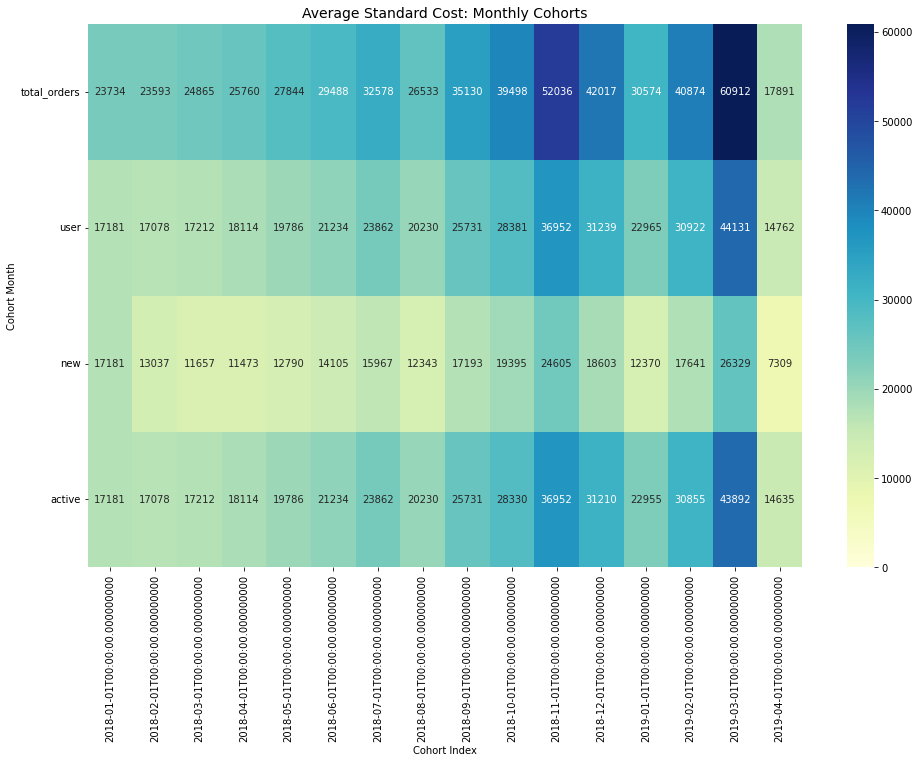

In [28]:
# verage_standard_cost.index = average_standard_cost.index.strftime('%Y-%m')
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
# final_norm = final_save.drop("amount")
sns.heatmap(final_save, annot = True,vmin = 0.0,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
# plt.show()
plt.savefig("cohorts_graph.png")